<a href="https://colab.research.google.com/github/shoreey/Predicting-Score-of-Inflammatory-Bowel-Disease-Using-Computer-Vision-/blob/main/Predicting_Scores_of_Inflammatory_bowel_Disease_Using_Computer_Vision_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing the Libraries

In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import io
import random
import scipy.io as sio
from scipy import ndimage
import scipy
from skimage.transform import resize
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import mean_squared_error
from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, explained_variance_score, max_error
import torch
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
from torchvision import models
import math
from functools import partial
from torch.autograd import Variable
import torch.optim as optim
from torch.optim.lr_scheduler import ReduceLROnPlateau
import time
import datetime
import copy
from PIL import Image
import statsmodels.api as sm
import torch.nn as nn
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import io
import random
import scipy.io as sio
from scipy import ndimage
import scipy
from skimage.transform import resize
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import mean_squared_error
from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, explained_variance_score, max_error
import torch
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
from torchvision import models
import math
from functools import partial
from torch.autograd import Variable
import torch.optim as optim
from torch.optim.lr_scheduler import ReduceLROnPlateau
import time
import datetime
import copy
from PIL import Image
import statsmodels.api as sm







# Data Manipulation

In [ ]:
BASE_DIR='C:\Data'
data_df = pd.read_excel("C:\PicassoOnly_AI_corretti_rev.xlsx")
data_df.head()
#print (len(data_df))

,Num,Video,Filename,Filename_WL_UCEIS,Mucosal,Vascular,Score,MES>1,UCEIS>1,RHI>3,...,VCE Frame 6,VCE Frame 7,VCE Frame 8,VCE Frame 9,VCE Frame 10,VCE Frame 11,VCE Frame 12,VCE Frame 13,VCE Frame 14,VCE Frame 15
0,1,01-01 rectum,muc_229_pat0101_section1.mat,muc_001_pat0101_section1.mat,7.0,3.0,13,3.0,5,8.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,2,01-01 sigmoid,muc_230_pat0101_section2.mat,none,0.0,0.0,0,0.0,0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,01-02 rectum,muc_001_pat0102_section1.mat,muc_002_pat0102_section1.mat,0.0,0.0,0,0.0,0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,01-02 sigmoid,muc_002_pat0102_section2.mat,muc_003_pat0102_section2.mat,0.0,0.0,0,0.0,1,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,01-03 rectum,muc_003_pat0103_section1.mat,muc_004_pat0103_section1.mat,0.0,0.0,0,0.0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
BASE_DIR='E:\Data Science\Dissertation\Additional Work\Sukhjinder_bajwa_4126047\Data'
data_df = pd.read_excel("E:\Data Science\Dissertation\Additional Work\Sukhjinder_bajwa_4126047\PicassoOnly_AI_corretti_rev.xlsx")
data_df.head()
#print (len(data_df))

,Num,Video,Filename,Filename_WL_UCEIS,Mucosal,Vascular,Score,MES>1,UCEIS>1,RHI>3,...,VCE Frame 6,VCE Frame 7,VCE Frame 8,VCE Frame 9,VCE Frame 10,VCE Frame 11,VCE Frame 12,VCE Frame 13,VCE Frame 14,VCE Frame 15
0,1,01-01 rectum,muc_229_pat0101_section1.mat,muc_001_pat0101_section1.mat,7.0,3.0,13,3.0,5,8.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,2,01-01 sigmoid,muc_230_pat0101_section2.mat,none,0.0,0.0,0,0.0,0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,01-02 rectum,muc_001_pat0102_section1.mat,muc_002_pat0102_section1.mat,0.0,0.0,0,0.0,0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,01-02 sigmoid,muc_002_pat0102_section2.mat,muc_003_pat0102_section2.mat,0.0,0.0,0,0.0,1,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,01-03 rectum,muc_003_pat0103_section1.mat,muc_004_pat0103_section1.mat,0.0,0.0,0,0.0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Data Visualization

In [ ]:
# Extract the relevant columns for your regression model
# In this case, we are extracting 'Filename' and 'Score' columns
# You can add more columns as needed for your regression task
regression_df = data_df[['Filename', 'Score']]

# Display the first few rows of the regression dataset to verify
print(regression_df.head())

# Optionally, you can shuffle the dataset for randomness
regression_df = regression_df.sample(frac=1).reset_index(drop=True)

                       Filename  Score
0  muc_229_pat0101_section1.mat     13
1  muc_230_pat0101_section2.mat      0
2  muc_001_pat0102_section1.mat      0
3  muc_002_pat0102_section2.mat      0
4  muc_003_pat0103_section1.mat      0


Mucosal Score 0: 189 patients
Mucosal Score 1: 27 patients
Mucosal Score 2: 9 patients
Mucosal Score 3: 16 patients
Mucosal Score 4: 13 patients
Mucosal Score 5: 11 patients
Mucosal Score 6: 21 patients
Mucosal Score 7: 16 patients
Mucosal Score 8: 5 patients
Mucosal Score 9: 9 patients
Vascular Score 0: 148 patients
Vascular Score 1: 54 patients
Vascular Score 2: 29 patients
Vascular Score 3: 34 patients
Vascular Score 4: 24 patients
Vascular Score 5: 14 patients
Vascular Score 6: 12 patients
Score 0: 265 patients
Score 1: 84 patients
Score 2: 45 patients
Score 3: 27 patients
Score 4: 22 patients
Score 5: 10 patients
Score 6: 7 patients
Score 7: 16 patients
Score 8: 7 patients
Score 9: 15 patients
Score 10: 7 patients
Score 11: 14 patients
Score 12: 10 patients
Score 13: 10 patients
Score 14: 12 patients
Score 15: 9 patients
MES>1: 0 - 338 patients
MES>1: 1 - 109 patients
MES>1: 2 - 49 patients
MES>1: 3 - 59 patients
MES>1: 4 - 2 patients
UCEIS>1: 0 - 283 patients
UCEIS>1: 1 - 102 pat

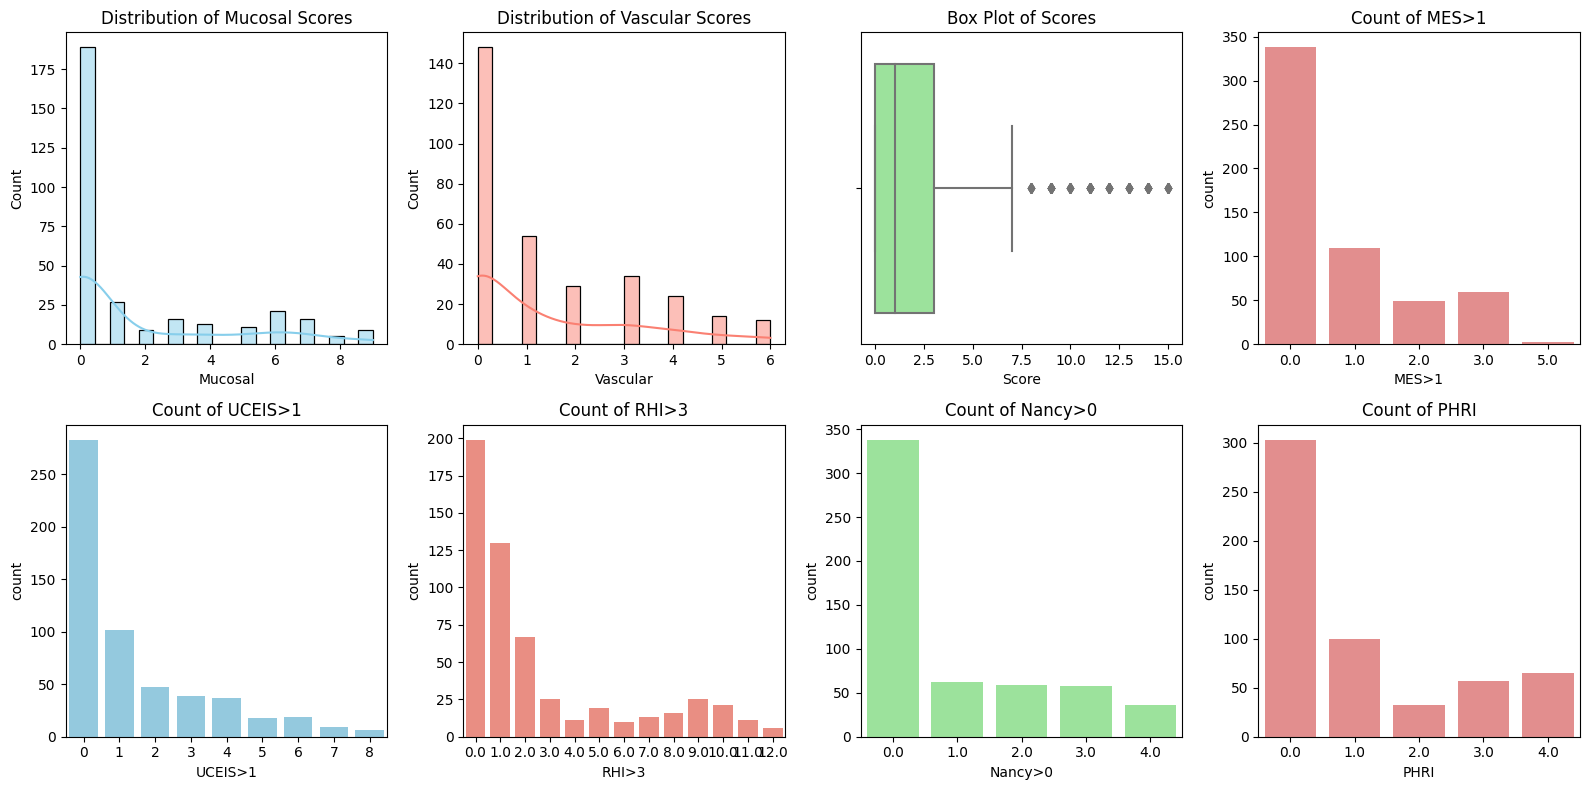

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(16, 8))

# Visualize Mucosal
sns.histplot(data_df['Mucosal'], bins=20, kde=True, ax=axes[0, 0], color='skyblue')
axes[0, 0].set_title('Distribution of Mucosal Scores')
for i, val in enumerate(data_df['Mucosal'].value_counts().sort_index()):
    print(f'Mucosal Score {i}: {val} patients')

# Visualize Vascular
sns.histplot(data_df['Vascular'], bins=20, kde=True, ax=axes[0, 1], color='salmon')
axes[0, 1].set_title('Distribution of Vascular Scores')
for i, val in enumerate(data_df['Vascular'].value_counts().sort_index()):
    print(f'Vascular Score {i}: {val} patients')

# Visualize Score
sns.boxplot(data=data_df, x='Score', ax=axes[0, 2], color='lightgreen')
axes[0, 2].set_title('Box Plot of Scores')
for i, val in enumerate(data_df['Score'].value_counts().sort_index()):
    print(f'Score {i}: {val} patients')

# Visualize MES>1
sns.countplot(data=data_df, x='MES>1', ax=axes[0, 3], color='lightcoral')
axes[0, 3].set_title('Count of MES>1')
for i, val in enumerate(data_df['MES>1'].value_counts().sort_index()):
    print(f'MES>1: {i} - {val} patients')

# Visualize UCEIS>1
sns.countplot(data=data_df, x='UCEIS>1', ax=axes[1, 0], color='skyblue')
axes[1, 0].set_title('Count of UCEIS>1')
for i, val in enumerate(data_df['UCEIS>1'].value_counts().sort_index()):
    print(f'UCEIS>1: {i} - {val} patients')

# Visualize RHI>3
sns.countplot(data=data_df, x='RHI>3', ax=axes[1, 1], color='salmon')
axes[1, 1].set_title('Count of RHI>3')
for i, val in enumerate(data_df['RHI>3'].value_counts().sort_index()):
    print(f'RHI>3: {i} - {val} patients')

# Visualize Nancy>0
sns.countplot(data=data_df, x='Nancy>0', ax=axes[1, 2], color='lightgreen')
axes[1, 2].set_title('Count of Nancy>0')
for i, val in enumerate(data_df['Nancy>0'].value_counts().sort_index()):
    print(f'Nancy>0: {i} - {val} patients')

# Visualize PHRI
sns.countplot(data=data_df, x='PHRI', ax=axes[1, 3], color='lightcoral')
axes[1, 3].set_title('Count of PHRI')
for i, val in enumerate(data_df['PHRI'].value_counts().sort_index()):
    print(f'PHRI: {i} - {val} patients')

# Adjust layout and display
plt.tight_layout()
plt.show()


Correlation between Mucosal and Mucosal: 1.00
Correlation between Mucosal and Vascular: 0.81
Correlation between Mucosal and Score: 0.94
Correlation between Mucosal and MES>1: 0.88
Correlation between Mucosal and UCEIS>1: 0.89
Correlation between Mucosal and RHI>3: 0.76
Correlation between Mucosal and Nancy>0: 0.74
Correlation between Mucosal and PHRI: 0.69
Correlation between Vascular and Vascular: 1.00
Correlation between Vascular and Score: 0.89
Correlation between Vascular and MES>1: 0.81
Correlation between Vascular and UCEIS>1: 0.86
Correlation between Vascular and RHI>3: 0.75
Correlation between Vascular and Nancy>0: 0.72
Correlation between Vascular and PHRI: 0.70
Correlation between Score and Score: 1.00
Correlation between Score and MES>1: 0.90
Correlation between Score and UCEIS>1: 0.94
Correlation between Score and RHI>3: 0.78
Correlation between Score and Nancy>0: 0.77
Correlation between Score and PHRI: 0.71
Correlation between MES>1 and MES>1: 1.00
Correlation between ME

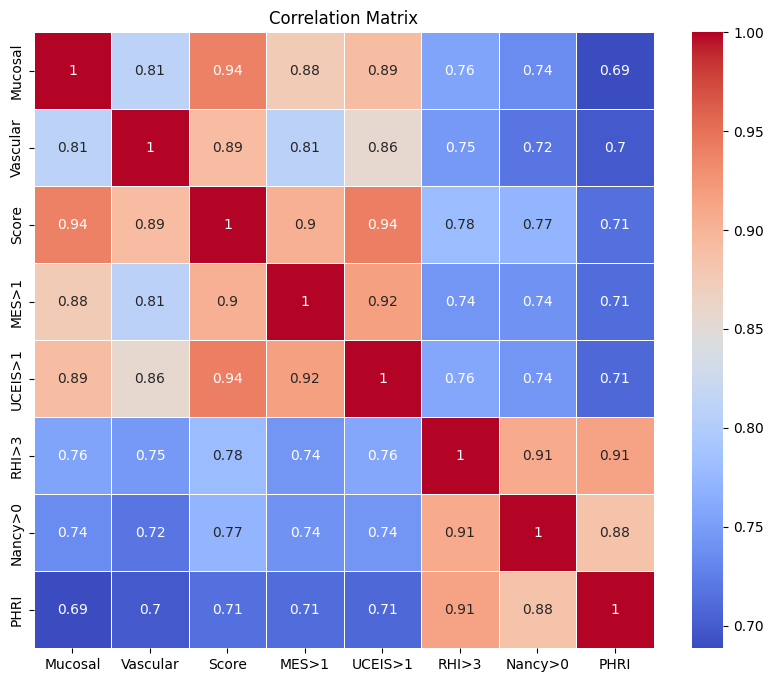

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
correlation_matrix = data_df[['Mucosal', 'Vascular', 'Score', 'MES>1', 'UCEIS>1', 'RHI>3', 'Nancy>0', 'PHRI']].corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')

# Print the correlation scores
for i in range(len(correlation_matrix.columns)):
    for j in range(i, len(correlation_matrix.columns)):
        col1 = correlation_matrix.columns[i]
        col2 = correlation_matrix.columns[j]
        corr_score = correlation_matrix.iloc[i, j]
        print(f'Correlation between {col1} and {col2}: {corr_score:.2f}')

plt.show()


# Creating Dataset Class

In [ ]:
class IBD_Dataset(Dataset):
    def __init__(self, df: pd.DataFrame, imfolder: str, train: bool = True, transforms=None):
        self.df = df
        self.imfolder = imfolder
        self.train = train
        self.transforms = transforms
    def __getitem__(self, index):
        filename = self.df.iloc[index]['Filename']
        im_path = os.path.join(self.imfolder, filename.strip())
        data = sio.loadmat(im_path)
        img = data['x']
        # Select frames with a mean intensity >20 to exclude frames with no information or too dark
        img_mean = img.mean(axis=0).mean(axis=0)
        img_mean = img_mean[0, :].squeeze()
        img = img[:, :, :, img_mean > 20]
        sx = img.shape
        numframe = sx[3]
        if self.train:
            # for each video, all frames are available
            # calculate the scores for each frame
            scores = [self.df.iloc[index]['Score'] for _ in range(numframe)]
            # find the index of the frame with the highest score
            max_score_frame = np.argmax(scores)
            # use the frame with the highest score
            x = img[:, 0:400, :, max_score_frame].squeeze()
            x = Image.fromarray(x)
            if self.transforms:
                x = self.transforms(x)
            x = x.type(torch.FloatTensor)
            # return the highest score and the index of the frame with the highest score
            max_score = scores[max_score_frame]
            posframe = max_score_frame
        else:
            # Process all frames in the video
            x = torch.zeros(numframe, 224, 224, 3)
            img = img[:, 0:400, :, :]
            img = torch.from_numpy(img)
            img = img.permute((3, 0, 1, 2))
            for i in range(numframe):
                # Process each frame individually
                tmp = img[i, :, :, :].squeeze()
                tmp = torch.tensor(tmp)
                tmp = tmp.type(torch.FloatTensor)
                tmp = tmp.permute(2, 0, 1)
                tmp = transforms.Resize((224, 224))(tmp)
                tmp = transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])(tmp)
                tmp = tmp.permute(1, 2, 0)
                x[i, :, :, :] = tmp
            # For testing, return the scores for all frames
            scores = [self.df.iloc[index]['Score'] for _ in range(numframe)]
            return x, scores

        return x, max_score, posframe

    def __len__(self):
        return len(self.df)

# Data Transformation

In [ ]:
# For training
train_transforms = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),  # Instead of RandomResizedCrop
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

# For validation
valid_transforms = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])


# Data Loaders

In [ ]:
# Extract all data belonging to the training set
train = data_df[data_df['Train_VCE_Endo'] == 1]

# Extract all data belonging to the validation set
valid = data_df[data_df['Train_VCE_Endo'] == 0]

# Reset index on both dataframes
train = train.reset_index(drop=True)
valid = valid.reset_index(drop=True)

# Targets for training and validation
train_targets = train.Score.values  # Use PICaSSO scores as target
valid_targets = valid.Score.values  # Use PICaSSO scores as target

train_dataset = IBD_Dataset(
    df=train,
    imfolder=BASE_DIR,
    train=True,
    transforms=train_transforms
)

valid_dataset = IBD_Dataset(
    df=valid,
    imfolder=BASE_DIR,
    train=True,
    transforms=valid_transforms
)

train_loader = DataLoader(
    train_dataset,
    batch_size=15,
    # num_workers=4,
    shuffle=True,
)

valid_loader = DataLoader(
    valid_dataset,
    batch_size=15,
    # num_workers=4,
    shuffle=False,
)


# Modelling

# DESNET

In [ ]:
import torch.nn.functional as F

class FrameRegressionDenseNet(nn.Module):
    def __init__(self):
        super(FrameRegressionDenseNet, self).__init__()

        self.numclass = 1  # Regression task

        self.densenet = torchvision.models.densenet121(pretrained=True)

        # Modify the classifier for regression
        num_ftrs = self.densenet.classifier.in_features
        self.densenet.classifier = nn.Linear(num_ftrs, self.numclass)

    def forward(self, x):
        # Adjust the forward pass according to the architecture of DenseNet
        x = self.densenet.features(x)
        x = F.relu(x, inplace=True)
        x = F.adaptive_avg_pool2d(x, (1, 1))
        x = torch.flatten(x, 1)
        x = self.densenet.classifier(x)

        return x

# Create an instance of the regression model using DenseNet
regression_model_dense = FrameRegressionDenseNet()


# EFFICIENTNET

In [ ]:
from efficientnet_pytorch import EfficientNet

class FrameRegressionEfficientNet(nn.Module):
    def __init__(self, model_name='efficientnet-b0'):
        super(FrameRegressionEfficientNet, self).__init__()

        self.numclass = 1  # Regression task

        # Choose the desired EfficientNet model, e.g., 'efficientnet-b0'
        self.efficientnet = EfficientNet.from_pretrained(model_name)

        # Modify the fully connected layer for regression
        num_ftrs = self.efficientnet._fc.in_features
        self.efficientnet._fc = nn.Linear(num_ftrs, self.numclass)

    def forward(self, x):
        x = self.efficientnet(x)
        return x

# Create an instance of the new regression model with EfficientNet-B0
regression_model_efficientnet = FrameRegressionEfficientNet()


Loaded pretrained weights for efficientnet-b0


# RESNET50

In [ ]:
class FrameRegressionResNet50(nn.Module):
    def __init__(self):
        super(FrameRegressionResNet50, self).__init__()

        self.numclass = 1  # Regression task

        # Choose ResNet-50
        self.resnet50 = models.resnet50(pretrained=True)

        # Modify the fully connected layer for regression
        num_ftrs = self.resnet50.fc.in_features
        self.resnet50.fc = nn.Linear(num_ftrs, self.numclass)

    def forward(self, x):
        x = self.resnet50(x)
        return x

# Create an instance of the new regression model with ResNet-50
regression_model_resnet50 = FrameRegressionResNet50()


In [ ]:
regression_model_resnet50

FrameRegressionResNet50(
  (resnet50): ResNet(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample): Seque

In [ ]:
regression_model_dense

FrameRegressionDenseNet(
  (densenet): DenseNet(
    (features): Sequential(
      (conv0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (norm0): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu0): ReLU(inplace=True)
      (pool0): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (denseblock1): _DenseBlock(
        (denselayer1): _DenseLayer(
          (norm1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (relu1): ReLU(inplace=True)
          (conv1): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (norm2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (relu2): ReLU(inplace=True)
          (conv2): Conv2d(128, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        )
        (denselayer2): _DenseLayer(
          (norm1): BatchNorm2d(96, eps=1e

In [ ]:
regression_model_efficientnet

FrameRegressionEfficientNet(
  (efficientnet): EfficientNet(
    (_conv_stem): Conv2dStaticSamePadding(
      3, 32, kernel_size=(3, 3), stride=(2, 2), bias=False
      (static_padding): ZeroPad2d((0, 1, 0, 1))
    )
    (_bn0): BatchNorm2d(32, eps=0.001, momentum=0.010000000000000009, affine=True, track_running_stats=True)
    (_blocks): ModuleList(
      (0): MBConvBlock(
        (_depthwise_conv): Conv2dStaticSamePadding(
          32, 32, kernel_size=(3, 3), stride=[1, 1], groups=32, bias=False
          (static_padding): ZeroPad2d((1, 1, 1, 1))
        )
        (_bn1): BatchNorm2d(32, eps=0.001, momentum=0.010000000000000009, affine=True, track_running_stats=True)
        (_se_reduce): Conv2dStaticSamePadding(
          32, 8, kernel_size=(1, 1), stride=(1, 1)
          (static_padding): Identity()
        )
        (_se_expand): Conv2dStaticSamePadding(
          8, 32, kernel_size=(1, 1), stride=(1, 1)
          (static_padding): Identity()
        )
        (_project_conv): Co

# Train Regression function

In [ ]:
def evaluate_regression_model(model, dataloader, device):
    all_preds = []
    all_actuals = []

    model.eval()
    with torch.no_grad():
        for inputs, targets, _ in dataloader:
            inputs = inputs.to(device)
            targets = targets.to(device)

            outputs = model(inputs)
            all_preds.extend(outputs.cpu().numpy())
            all_actuals.extend(targets.cpu().numpy())

    mse = mean_squared_error(all_actuals, all_preds)
    rmse = np.sqrt(mse)
    r2 = r2_score(all_actuals, all_preds)
    mae = mean_absolute_error(all_actuals, all_preds)
    evs = explained_variance_score(all_actuals, all_preds)
    me = max_error(all_actuals, all_preds)

    return mse, rmse, r2, mae, evs, me, all_actuals, all_preds

def evaluate_and_visualize(model, dataloader, device):
    mse, rmse, r2, mae, evs, me, all_actuals, all_preds = evaluate_regression_model(model, dataloader, device)

    print(f'Mean Squared Error (MSE): {mse:.4f}')
    print(f'Root Mean Squared Error (RMSE): {rmse:.4f}')
    print(f'R-squared (R2): {r2:.4f}')
    print(f'Mean Absolute Error (MAE): {mae:.4f}')
    print(f'Explained Variance Score (EVS): {evs:.4f}')
    print(f'Max Error (ME): {me:.4f}')

    # Plot actual vs predicted
    plt.scatter(all_actuals, all_preds, color='blue')
    plt.xlabel('Actual Scores')
    plt.ylabel('Predicted Scores')
    plt.title('Actual Scores vs. Predicted Scores')
    plt.show()

# Updated train_regression_model function
def train_regression_model(datasets, dataloaders, model, criterion, optimizer, scheduler, num_epochs, device):
    N_iter_internal = 10
    since = time.time()

    for epoch in range(num_epochs):
        print('Epoch {}/{}'.format(epoch, num_epochs - 1))
        print('-' * 10)

        for phase in ['train', 'valid']:
            if phase == 'train':
                model.train()
            else:
                model.eval()

            running_loss = 0.0
            all_preds = []  # To store predicted scores
            all_actuals = []  # To store actual scores

            for ct in range(N_iter_internal):
                for x, w, posframe in dataloaders[phase]:
                    x = x.to(device)
                    w = w.to(device).float()  # Convert w to Float
                    posframe = posframe.to(device)

                    optimizer.zero_grad()

                    with torch.set_grad_enabled(phase == 'train'):
                        model = model.to(device)
                        outputs = model(x)
                        loss = criterion(outputs, w.unsqueeze(1))  # Regression loss

                        if phase == 'train':
                            loss.backward()
                            optimizer.step()

                    running_loss += loss.item() * x.size(0)
                    all_preds.extend(outputs.cpu().detach().numpy())  # Store predicted scores
                    all_actuals.extend(w.cpu().detach().numpy())  # Store actual scores

            if phase == 'train':
                scheduler.step()

            epoch_loss = running_loss / len(datasets[phase])
            print('{} Loss: {:.4f}'.format(phase, epoch_loss))

        # Evaluate and visualize the model after each epoch
        if epoch == num_epochs - 1:
            evaluate_and_visualize(model, dataloaders['valid'], device)

    time_elapsed = time.time() - since
    print('Training complete in {:.0f}m {:.0f}s'.format(time_elapsed // 60, time_elapsed % 60))

    return model


Epoch 0/9
----------
train Loss: 63.0621
valid Loss: 76.0669
Epoch 1/9
----------
train Loss: 19.2847
valid Loss: 70.9234
Epoch 2/9
----------
train Loss: 12.0283
valid Loss: 75.0033
Epoch 3/9
----------
train Loss: 12.1110
valid Loss: 70.7011
Epoch 4/9
----------
train Loss: 9.2521
valid Loss: 60.9895
Epoch 5/9
----------
train Loss: 7.8039
valid Loss: 65.6967
Epoch 6/9
----------
train Loss: 4.4096
valid Loss: 58.9500
Epoch 7/9
----------
train Loss: 13.3625
valid Loss: 54.2832
Epoch 8/9
----------
train Loss: 4.5988
valid Loss: 65.5380
Epoch 9/9
----------
train Loss: 4.9642
valid Loss: 57.1577
Mean Squared Error (MSE): 5.7158
Root Mean Squared Error (RMSE): 2.3908
R-squared (R2): 0.7122
Mean Absolute Error (MAE): 1.5907
Explained Variance Score (EVS): 0.7321
Max Error (ME): 9.2187


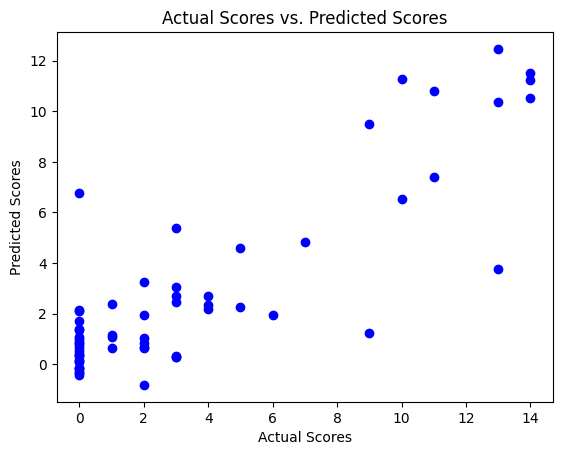

Training complete in 165m 4s


In [ ]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

# Define your regression model, loss criterion, optimizer, and scheduler
regression_model = FrameRegressionDenseNet()  # DenseNet name of your regression model class
criterion = nn.MSELoss() # Use Mean Squared Error loss for regression
optimizer = torch.optim.AdamW(regression_model.parameters(), lr=1e-4, weight_decay=0.001)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=50, gamma=0.1)

num_epochs = 10

# Create the datasets and dataloaders dictionaries
datasets = {'train': train_dataset, 'valid': valid_dataset}
dataloaders = {'train': train_loader, 'valid': valid_loader}

# Train the regression model
trained_regression_model = train_regression_model(datasets, dataloaders, regression_model, criterion, optimizer, scheduler, num_epochs, device)


Loaded pretrained weights for efficientnet-b0
Epoch 0/9
----------
train Loss: 22.7164
valid Loss: 27.2477
Epoch 1/9
----------
train Loss: 12.5060
valid Loss: 22.6045
Epoch 2/9
----------
train Loss: 10.4952
valid Loss: 21.3803
Epoch 3/9
----------
train Loss: 9.7720
valid Loss: 21.1979
Epoch 4/9
----------
train Loss: 9.2795
valid Loss: 21.1787
Epoch 5/9
----------
train Loss: 8.6547
valid Loss: 19.8555
Epoch 6/9
----------
train Loss: 6.7155
valid Loss: 19.4412
Epoch 7/9
----------
train Loss: 6.4489
valid Loss: 20.1468
Epoch 8/9
----------
train Loss: 5.7438
valid Loss: 20.0255
Epoch 9/9
----------
train Loss: 5.3778
valid Loss: 18.8546
Mean Squared Error (MSE): 8.0476
Root Mean Squared Error (RMSE): 2.8368
R-squared (R2): 0.5948
Mean Absolute Error (MAE): 1.8855
Explained Variance Score (EVS): 0.6437
Max Error (ME): 11.4033


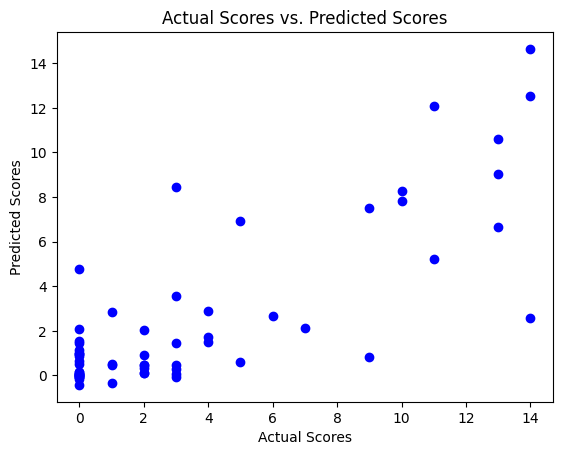

Training complete in 136m 26s


In [ ]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

# Define your regression model, loss criterion, optimizer, and scheduler
regression_model = FrameRegressionEfficientNet()  # EfficientNet regression model class
criterion = nn.L1Loss() # Mean Squared Error loss for regression
optimizer = torch.optim.AdamW(regression_model.parameters(), lr=1e-4, weight_decay=0.001)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=50, gamma=0.1)

num_epochs = 10

# Create the datasets and dataloaders dictionaries
datasets = {'train': train_dataset, 'valid': valid_dataset}
dataloaders = {'train': train_loader, 'valid': valid_loader}

# Train the regression model
trained_regression_model = train_regression_model(datasets, dataloaders, regression_model, criterion, optimizer, scheduler, num_epochs, device)


C:\Users\user\anaconda3\envs\dissertation\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\user\anaconda3\envs\dissertation\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Epoch 0/9
----------
train Loss: 11.2516
valid Loss: 13.9047
Epoch 1/9
----------
train Loss: 5.3585
valid Loss: 14.1045
Epoch 2/9
----------
train Loss: 3.7268
valid Loss: 15.8999
Epoch 3/9
----------
train Loss: 3.1584
valid Loss: 13.8531
Epoch 4/9
----------
train Loss: 1.4603
valid Loss: 14.9320
Epoch 5/9
----------
train Loss: 0.9100
valid Loss: 13.5437
Epoch 6/9
----------
train Loss: 0.7553
valid Loss: 14.4835
Epoch 7/9
----------
train Loss: 0.3498
valid Loss: 13.8110
Epoch 8/9
----------
train Loss: 0.3593
valid Loss: 14.9431
Epoch 9/9
----------
train Loss: 0.3759
valid Loss: 14.5015
Mean Squared Error (MSE): 8.5303
Root Mean Squared Error (RMSE): 2.9207
R-squared (R2): 0.5705
Mean Absolute Error (MAE): 1.8553
Explained Variance Score (EVS): 0.5893
Max Error (ME): 12.3014


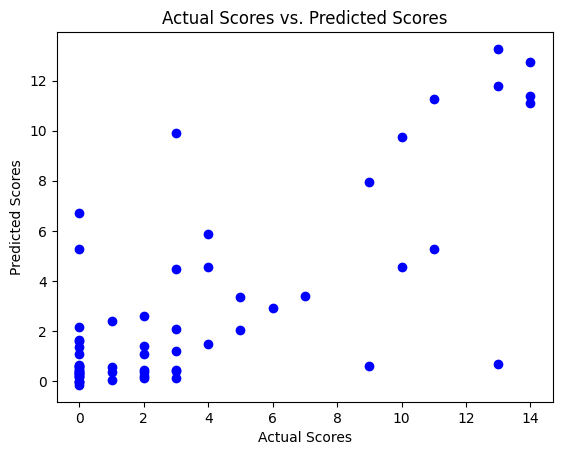

Training complete in 160m 38s


In [ ]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

# Defined regression model, loss criterion, optimizer, and scheduler
regression_model = FrameRegressionResNet50()  # Resnet regression model class
criterion = nn.SmoothL1Loss()  # Mean Squared Error loss for regression
optimizer = torch.optim.AdamW(regression_model.parameters(), lr=1e-4, weight_decay=0.001)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=50, gamma=0.1)

num_epochs = 10

# Create the datasets and dataloaders dictionaries
datasets = {'train': train_dataset, 'valid': valid_dataset}
dataloaders = {'train': train_loader, 'valid': valid_loader}

# Train the regression model
trained_regression_model = train_regression_model(datasets, dataloaders, regression_model, criterion, optimizer, scheduler, num_epochs, device)


# Comparison of different models after 10 epchos

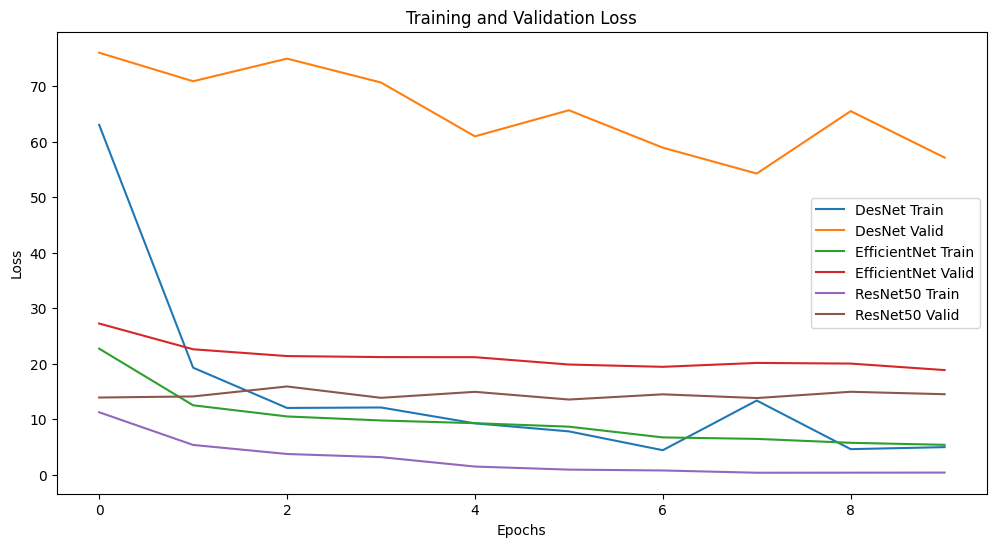

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Data
epochs = np.arange(0, 10)

# Updated values for DesNet
desnet_train_loss = [63.0621, 19.2847, 12.0283, 12.1110, 9.2521, 7.8039, 4.4096, 13.3625, 4.5988, 4.9642]
desnet_valid_loss = [76.0669, 70.9234, 75.0033, 70.7011, 60.9895, 65.6967, 58.9500, 54.2832, 65.5380, 57.157]

# Updated values for EfficientNet
efficientnet_train_loss = [22.7164, 12.5060, 10.4952, 9.7720, 9.2795, 8.6547, 6.7155, 6.4489, 5.7438, 5.3778]
efficientnet_valid_loss = [27.2477, 22.6045, 21.3803, 21.1979, 21.1787, 19.8555, 19.4412, 20.1468, 20.0255, 18.8546]

# Updated values for ResNet50
resnet50_train_loss = [11.2516, 5.3585, 3.7268, 3.1584, 1.4603, 0.9100, 0.7553, 0.3498, 0.3593, 0.3759]
resnet50_valid_loss = [13.9047, 14.1045, 15.8999, 13.8531, 14.9320, 13.5437, 14.4835, 13.8110, 14.9431, 14.5015]

# Plotting training and validation loss
plt.figure(figsize=(12, 6))
plt.plot(epochs, desnet_train_loss, label='DesNet Train')
plt.plot(epochs, desnet_valid_loss, label='DesNet Valid')
plt.plot(epochs, efficientnet_train_loss, label='EfficientNet Train')
plt.plot(epochs, efficientnet_valid_loss, label='EfficientNet Valid')
plt.plot(epochs, resnet50_train_loss, label='ResNet50 Train')
plt.plot(epochs, resnet50_valid_loss, label='ResNet50 Valid')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()


# Comparison

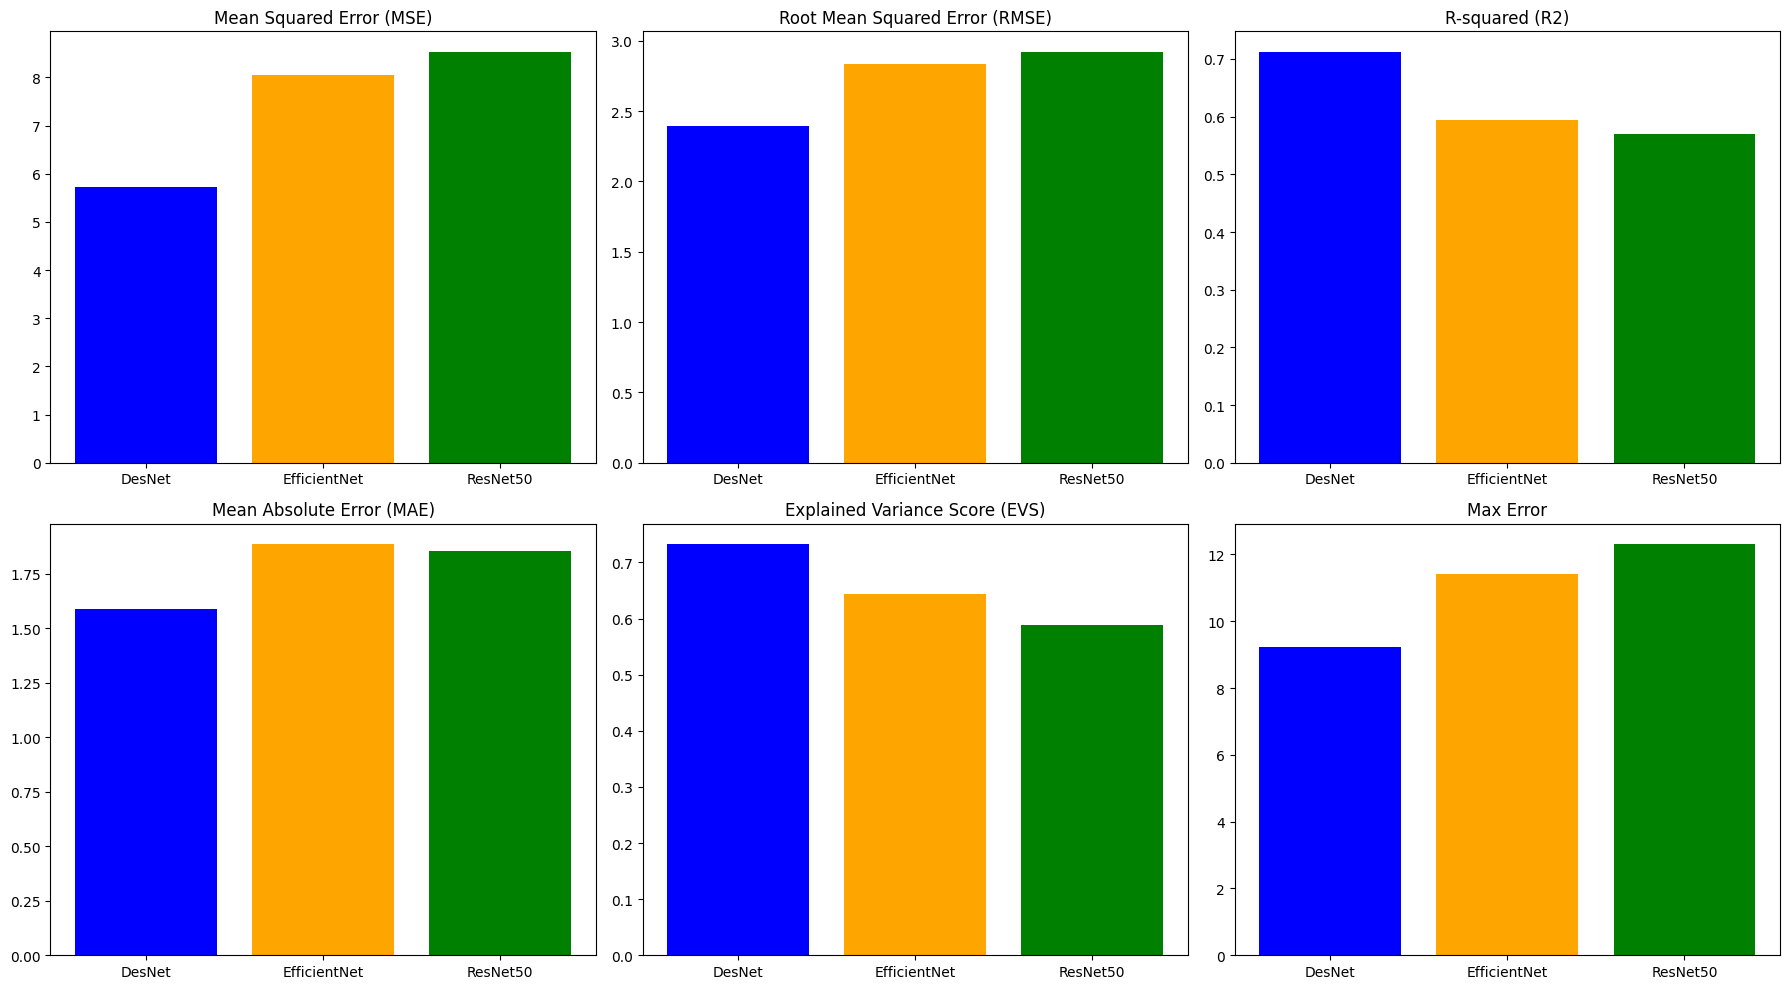

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

labels = ['DesNet', 'EfficientNet', 'ResNet50']

mse = [5.7158, 8.0476, 8.5303]
rmse = [2.3908, 2.8368, 2.9207]
r2 = [0.7122, 0.5948, 0.5705]
mae = [1.5907, 1.8855, 1.8553]
evs = [0.7321, 0.6437, 0.5893]
max_error = [9.2187, 11.4033, 12.3014]

# Plotting evaluation metrics separately
fig, axs = plt.subplots(2, 3, figsize=(18, 10))

# MSE
axs[0, 0].bar(np.arange(len(labels)), mse, color=['blue', 'orange', 'green'])
axs[0, 0].set_title('Mean Squared Error (MSE)')
axs[0, 0].set_xticks(np.arange(len(labels)))
axs[0, 0].set_xticklabels(labels)

# RMSE
axs[0, 1].bar(np.arange(len(labels)), rmse, color=['blue', 'orange', 'green'])
axs[0, 1].set_title('Root Mean Squared Error (RMSE)')
axs[0, 1].set_xticks(np.arange(len(labels)))
axs[0, 1].set_xticklabels(labels)

# R-squared
axs[0, 2].bar(np.arange(len(labels)), r2, color=['blue', 'orange', 'green'])
axs[0, 2].set_title('R-squared (R2)')
axs[0, 2].set_xticks(np.arange(len(labels)))
axs[0, 2].set_xticklabels(labels)

# MAE
axs[1, 0].bar(np.arange(len(labels)), mae, color=['blue', 'orange', 'green'])
axs[1, 0].set_title('Mean Absolute Error (MAE)')
axs[1, 0].set_xticks(np.arange(len(labels)))
axs[1, 0].set_xticklabels(labels)

# EVS
axs[1, 1].bar(np.arange(len(labels)), evs, color=['blue', 'orange', 'green'])
axs[1, 1].set_title('Explained Variance Score (EVS)')
axs[1, 1].set_xticks(np.arange(len(labels)))
axs[1, 1].set_xticklabels(labels)

# Max Error
axs[1, 2].bar(np.arange(len(labels)), max_error, color=['blue', 'orange', 'green'])
axs[1, 2].set_title('Max Error')
axs[1, 2].set_xticks(np.arange(len(labels)))
axs[1, 2].set_xticklabels(labels)

plt.tight_layout()
plt.show()


In [ ]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print("Device:", device)


Device: cpu
